In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import f1_score,confusion_matrix,log_loss
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
import statistics
import warnings


warnings.filterwarnings("ignore")


In [2]:
response = pd.read_csv("/Users/suzhewu/Desktop/MIE1624/Assignment2/clean_kaggle_data_2022.csv",low_memory=False)
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Columns: 298 entries, Duration (in seconds) to Q29_buckets
dtypes: float64(1), object(297)
memory usage: 18.5+ MB


In [3]:
response[response["Q29_buckets"].isnull()]
response[response["Q29_Encoded"].isnull()]

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN


In [4]:
response = response.fillna("unknow")  ## Filling the empty with unknow

response = response.iloc[:,1:]  #drop the first column since no help for further analysis
response2 = response.iloc[1:,:]
response2


,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
1,55-59,Man,France,No,Coursera,unknow,Kaggle Learn Courses,unknow,unknow,unknow,...,"Course Forums (forums.fast.ai, Coursera forums...",unknow,unknow,"Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,2.0,"20,000-29,999"
2,30-34,Man,Germany,No,Coursera,edX,unknow,unknow,unknow,Udacity,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,"Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,10.0,"100,000-124,999"
3,70+,Man,Australia,No,Coursera,unknow,Kaggle Learn Courses,unknow,unknow,unknow,...,unknow,unknow,"Podcasts (Chai Time Data Science, O’Reilly Dat...",unknow,unknow,unknow,unknow,unknow,10.0,"100,000-124,999"
4,40-44,Man,United States of America,No,Coursera,unknow,Kaggle Learn Courses,unknow,Fast.ai,Udacity,...,unknow,unknow,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,13.0,"200,000-299,999"
5,40-44,Man,United States of America,No,Coursera,unknow,unknow,unknow,unknow,Udacity,...,unknow,unknow,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",unknow,unknow,unknow,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,United States of America,No,unknow,unknow,Kaggle Learn Courses,DataCamp,unknow,unknow,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,"Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,10.0,"100,000-124,999"
8133,35-39,Man,India,No,unknow,unknow,unknow,unknow,unknow,unknow,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,unknow,unknow,unknow,unknow,unknow,0.0,"0-9,999"
8134,40-44,Man,India,No,unknow,unknow,unknow,DataCamp,unknow,unknow,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,unknow,unknow,unknow,unknow,unknow,0.0,"0-9,999"
8135,25-29,Man,Turkey,No,unknow,unknow,unknow,DataCamp,unknow,unknow,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,unknow,unknow,unknow,unknow,unknow,2.0,"20,000-29,999"


In [5]:

response2 = response2.drop("Q4",axis = 1)


def encode(response2,col):
    encode = {}
    i = 0

    for en in np.unique(response2[col]):
        if en != 'unknow':
            encode[en] = i
            i+=1
        else:
            encode[en] = 'unknow'
            i+=1
    return encode






In [6]:
response2["Q26"].value_counts()

20+      2061
1-2      1658
0        1298
3-4      1257
5-9      1029
10-14     595
15-19     238
Name: Q26, dtype: int64

In [7]:
Q11_encode = {  'I have never written code':1,
    '< 1 years': 2,
    '1-3 years': 3,
    '3-5 years': 4, 
    '5-10 years':5,
    '10-20 years': 6,
    '20+ years':7,
   }


Q43_encode = {  'Never': 1,
    'Once': 2,
    '2-5 times': 3, 
    '6-25 times':4,
    'More than 25 times': 5,
   }

platform_encode = encode(response2,col='Q32')



method_encode = encode(response2,col='Q27')


individual_encode = {  '0': 1,
    '1-2': 2,
    '3-4': 3, 
    '5-9':4,
    '10-14': 5,
    '15-19':6,
    '20+': 7
   }



num_empoly_encode = {   '0-49 employees': 1,
    '50-249 employees': 2,
    '250-999 employees': 3, 
    '1000-9,999 employees':4,
    '10,000 or more employees': 5,

   }

employe_encode = encode(response2,col='Q24')


role_encode = encode(response2,col="Q23")



hub_encode = encode(response2,col="Q22")

age_encode = {   '25-29': 1,
    '30-34': 2,
    '35-39': 2, 
    '40-44': 3,
    '22-24': 1,
    '45-49': 3, 
    '50-54': 4,
    '55-59': 4,
    '60-69': 5, 
    '18-21': 1,
    '70+': 6,
   }

gender_encode = {   'Man': 1,
    'Woman': 2,
    'Nonbinary': 3,
    'Prefer not to say': 4,
    'Prefer to self-describe': 5,
   }

Degree_encode = { 'Bachelor’s degree': 1,
    'Master’s degree': 2,
    'Doctoral degree': 3,
    'I prefer not to answer': 4,
    'Some college/university study without earning a bachelor’s degree': 5,
    'Professional doctorate': 6,
    'No formal education past high school': 7,
}

Publish_encode = { 'Yes': 1,
    'No': 2,
    'unknow':'unknow'
}


experience_encode = {   'Under 1 year': 1,
    '1-2 years': 2,
    'I do not use machine learning methods': 3, 
    '2-3 years': 4,
    '5-10 years': 5,
    '4-5 years': 6, 
    '3-4 years': 7,
    '10-20 years': 8,
    'unknow':'unknow'
}




In [8]:
encoding = {}
i  =len(response2['Q29'].value_counts(ascending = True).index)
for name in (response2['Q29'].value_counts(ascending = True).index):
    encoding[name] = i
    i-=1
encoding

{'>$1,000,000': 26,
 '$500,000-999,999': 25,
 '300,000-499,999': 24,
 '250,000-299,999': 23,
 '200,000-249,999': 22,
 '90,000-99,999': 21,
 '80,000-89,999': 20,
 '4,000-4,999': 19,
 '3,000-3,999': 18,
 '125,000-149,999': 17,
 '2,000-2,999': 16,
 '25,000-29,999': 15,
 '70,000-79,999': 14,
 '15,000-19,999': 13,
 '60,000-69,999': 12,
 '20,000-24,999': 11,
 '150,000-199,999': 10,
 '7,500-9,999': 9,
 '50,000-59,999': 8,
 '5,000-7,499': 7,
 '100,000-124,999': 6,
 '40,000-49,999': 5,
 '1,000-1,999': 4,
 '30,000-39,999': 3,
 '10,000-14,999': 2,
 '$0-999': 1}

In [9]:
encoding_Q30 = {}
i  =len(response2['Q30'].value_counts(ascending = True).index)
for name in (response2['Q30'].value_counts(ascending = True).index):
    if name == 'unknow':
        encoding_Q30[name] = 'unknow'
        i-=1
    else:
        encoding_Q30[name] = i
        i-=1
encoding_Q30

{'unknow': 'unknow',
 '$100,000 or more ($USD)': 6,
 '$10,000-$99,999': 5,
 '$1-$99': 4,
 '$1000-$9,999': 3,
 '$100-$999': 2,
 '$0 ($USD)': 1}

In [10]:
response2["Q2"] = response2["Q2"].map(age_encode)
response2["Q3"] = response2["Q3"].map(gender_encode)
response2["Q8"] = response2["Q8"].map(Degree_encode)
response2["Q9"] = response2["Q9"].map(Publish_encode)
response2["Q11"] = response2["Q11"].map(Q11_encode)
response2["Q16"] = response2["Q16"].map(experience_encode)
response2["Q22"] = response2["Q22"].map(hub_encode)
response2["Q23"] = response2["Q23"].map(role_encode)
response2["Q24"] = response2["Q24"].map(employe_encode)
response2["Q25"] = response2["Q25"].map(num_empoly_encode)
response2["Q26"] = response2["Q26"].map(individual_encode)
response2["Q27"] = response2["Q27"].map(method_encode)
response2["Q29"] = response2["Q29"].map(encoding)
response2["Q30"] = response2["Q30"].map(encoding_Q30)
response2["Q32"] = response2["Q32"].map(platform_encode)
response2["Q43"] = response2["Q43"].map(Q43_encode)

In [11]:
response2

,Q2,Q3,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
1,4,1,No,Coursera,unknow,Kaggle Learn Courses,unknow,unknow,unknow,Udemy,...,"Course Forums (forums.fast.ai, Coursera forums...",unknow,unknow,"Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,2.0,"20,000-29,999"
2,2,1,No,Coursera,edX,unknow,unknow,unknow,Udacity,Udemy,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,"Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,10.0,"100,000-124,999"
3,6,1,No,Coursera,unknow,Kaggle Learn Courses,unknow,unknow,unknow,unknow,...,unknow,unknow,"Podcasts (Chai Time Data Science, O’Reilly Dat...",unknow,unknow,unknow,unknow,unknow,10.0,"100,000-124,999"
4,3,1,No,Coursera,unknow,Kaggle Learn Courses,unknow,Fast.ai,Udacity,Udemy,...,unknow,unknow,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,13.0,"200,000-299,999"
5,3,1,No,Coursera,unknow,unknow,unknow,unknow,Udacity,Udemy,...,unknow,unknow,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",unknow,unknow,unknow,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,3,1,No,unknow,unknow,Kaggle Learn Courses,DataCamp,unknow,unknow,unknow,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,"Blogs (Towards Data Science, Analytics Vidhya,...",unknow,unknow,unknow,unknow,10.0,"100,000-124,999"
8133,2,1,No,unknow,unknow,unknow,unknow,unknow,unknow,unknow,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,unknow,unknow,unknow,unknow,unknow,0.0,"0-9,999"
8134,3,1,No,unknow,unknow,unknow,DataCamp,unknow,unknow,Udemy,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,unknow,unknow,unknow,unknow,unknow,0.0,"0-9,999"
8135,1,1,No,unknow,unknow,unknow,DataCamp,unknow,unknow,Udemy,...,unknow,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknow,unknow,unknow,unknow,unknow,unknow,2.0,"20,000-29,999"


**Feature Selectrion**

In [12]:
## If the feature has 70% or more missing data, then drop the feature column ##

emp_len = len(response[response["Q6_3"] == "unknow"])
emp_len_list= []

for name in response.columns:
    emp_len = len(response[response[name]=='unknow'])
    emp_len = emp_len/8137
    if emp_len >= 0.38:
        response2 = response2.drop(name,axis = 1)



In [13]:
def preproess (response,col):
    modify = []
    for elements in response[col]:
        
        if elements != 0:
            elements = 1
        modify.append(elements)

    return modify

response2

,Q2,Q3,Q5,Q7_2,Q8,Q9,Q11,Q12_1,Q15_1,Q16,Q23,Q24,Q25,Q26,Q27,Q29,Q30,Q29_Encoded,Q29_buckets
1,4,1,No,"Online courses (Coursera, EdX, etc)",5,unknow,6,Python,Matplotlib,2,4,11,1,2,4,15,3,2.0,"20,000-29,999"
2,2,1,No,"Online courses (Coursera, EdX, etc)",1,unknow,6,Python,Matplotlib,6,11,6,3,7,3,6,1,10.0,"100,000-124,999"
3,6,1,No,unknow,3,1,7,Python,unknow,5,10,5,4,7,4,6,2,10.0,"100,000-124,999"
4,3,1,No,"Online courses (Coursera, EdX, etc)",3,1,6,Python,unknow,5,5,3,4,7,3,22,2,13.0,"200,000-299,999"
5,3,1,No,unknow,2,1,6,Python,Matplotlib,5,4,3,4,3,3,22,6,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,3,1,No,"Online courses (Coursera, EdX, etc)",2,2,6,Python,Matplotlib,1,2,1,5,7,3,6,1,10.0,"100,000-124,999"
8133,2,1,No,"Online courses (Coursera, EdX, etc)",2,2,3,Python,Matplotlib,2,4,2,5,2,3,16,2,0.0,"0-9,999"
8134,3,1,No,"Online courses (Coursera, EdX, etc)",1,unknow,3,Python,Matplotlib,3,3,3,1,1,1,1,4,0.0,"0-9,999"
8135,1,1,No,"Online courses (Coursera, EdX, etc)",2,1,2,Python,unknow,1,6,4,5,1,1,15,2,2.0,"20,000-29,999"


In [14]:
response2 = response2.drop(columns='Q5')



In [15]:
response2["Q9"].value_counts()
response2["Q9"] = response2["Q9"].replace("unknow",1)

response2["Q16"].value_counts()
response2["Q16"] = response2["Q16"].replace("unknow",1)

response2["Q30"].value_counts()
response2["Q30"] = response2["Q30"].replace("unknow",1)
response2["Q29"].value_counts()
response2 = response2.replace("unknow",0)


In [16]:
mod_lst = ["Q7_2","Q12_1","Q15_1"]
for feature in mod_lst:
    res = preproess(response2,feature)
    response2[feature] = res


In [17]:
resultant = {}
resultant = pd.DataFrame(data = resultant,columns=response2.iloc[:,:-2].columns,index = response2.iloc[:,:-2].columns)

for i in list(response2.iloc[:,:-2].columns):
    for j in list(response2.iloc[:,:-2].columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(response2[i]).reshape(-1, 1), np.array(response2[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
            
resultant

,Q2,Q3,Q7_2,Q8,Q9,Q11,Q12_1,Q15_1,Q16,Q23,Q24,Q25,Q26,Q27,Q29,Q30
Q2,NaN,[4.269256010692192e-05],[0.5380443967448298],[3.756691911204479e-78],[0.012326377882239909],[9.80142237180262e-305],[0.0011149133617102552],[7.570073772785059e-08],[4.26340383402391e-63],[1.681269400566935e-99],[9.389124903314161e-42],[0.00022940348249152732],[0.3363824805312755],[0.0013299091801991447],[3.954732003350111e-92],[5.3198450578139624e-33]
Q3,[0.35160807036291297],NaN,[0.7200517085649163],[0.8245531788878389],[0.7287540999761791],[0.009856929305151977],[8.562960104920854e-05],[0.0008122211529650954],[0.15896580251286885],[0.20894757012201265],[0.8556106646781984],[0.8660072337674385],[0.9370538984794347],[0.1222228234441181],[0.8760878414684388],[0.09054250809671888]
Q7_2,[0.8369983784376742],[0.7923272282325186],NaN,[1.0175203417647994e-06],[0.028771996217426928],[0.000506318148176182],[8.001860043386131e-06],[1.807811377366835e-08],[0.00020595991077789087],[0.09161762365261183],[0.1624852744734859],[0.5796379215117557],[0.35717754136096613],[0.016985786816519105],[0.42185283815472624],[4.7654339023684e-05]
Q8,[2.3222939901216047e-64],[0.8921763563845738],[7.154295570869588e-13],NaN,[3.4235859529398455e-18],[4.18623143767981e-24],[0.21519951393462447],[0.3301932078241144],[1.646888116150061e-11],[2.1887111228456996e-63],[8.210404183259923e-49],[4.033355959752662e-12],[0.00019739821573257292],[5.248106008766393e-06],[0.005585174737736349],[0.5650251402703772]
Q9,[0.7517840495627364],[0.9767165482275345],[0.14630021839928495],[6.901010146481153e-118],NaN,[0.18712200644343419],[0.8494525580479034],[0.9074092852887958],[0.011168846539286494],[7.35962975675543e-05],[0.003730500870698932],[0.3255815836758656],[0.9976618728122764],[0.9347768792104602],[0.9999977539374453],[0.7996408515603936]
Q11,[4.268557724158912e-243],[5.750456773396822e-32],[0.014899319505647908],[1.605661110314977e-107],[5.951539324825542e-08],NaN,[6.312233967368054e-176],[8.281364092695306e-95],[0.0],[5.080492776727101e-190],[2.6025094105146374e-30],[3.0012262584076673e-09],[1.10124955346918e-62],[6.017239513285016e-139],[3.2964829435844473e-245],[1.667697128446286e-92]
Q12_1,[0.457836201469773],[9.739741264469634e-06],[0.001072907505680825],[0.0005485584645505189],[0.8342312976347421],[5.903645133522731e-129],NaN,[5.982381644194013e-128],[1.8292197491228604e-48],[1.3267555804315256e-21],[0.12564077212590619],[0.9758169741734162],[3.860890163301814e-06],[1.48778024279652e-24],[0.5998140127743703],[5.747347561470108e-09]
Q15_1,[0.0030357373169553636],[2.6097214145138247e-06],[3.3733069863202966e-08],[2.673833930110403e-07],[0.8636852886153077],[6.623053413222426e-116],[9.781711879061333e-228],NaN,[1.6602409966256298e-88],[5.582937579756712e-43],[0.03743347127757873],[0.9142434085955757],[2.118430737663484e-11],[1.9363125965505267e-37],[0.0799541612743716],[9.357434333783363e-13]
Q16,[8.849111737715579e-100],[1.8181554196209912e-18],[0.020053726942944394],[1.950767860867666e-204],[8.789061893983736e-21],[0.0],[1.3627156331583863e-151],[6.63623417249684e-98],NaN,[0.0],[1.1442992767985666e-20],[2.3375686670230538e-11],[1.839634613703789e-153],[0.0],[0.0],[7.28498901905156e-178]
Q23,[3.64247828229554e-171],[7.457015190264888e-05],[3.125318640214848e-18],[8.004446267076636e-257],[1.6285682773635615e-47],[7.12143280764095e-157],[5.570980619588565e-17],[2.0481671308169467e-11],[3.9816555932548545e-30],NaN,[0.0],[1.5173812453699415e-23],[3.989329270241845e-36],[1.5246542667103095e-95],[0.0017235444753819326],[5.306963828160656e-15]


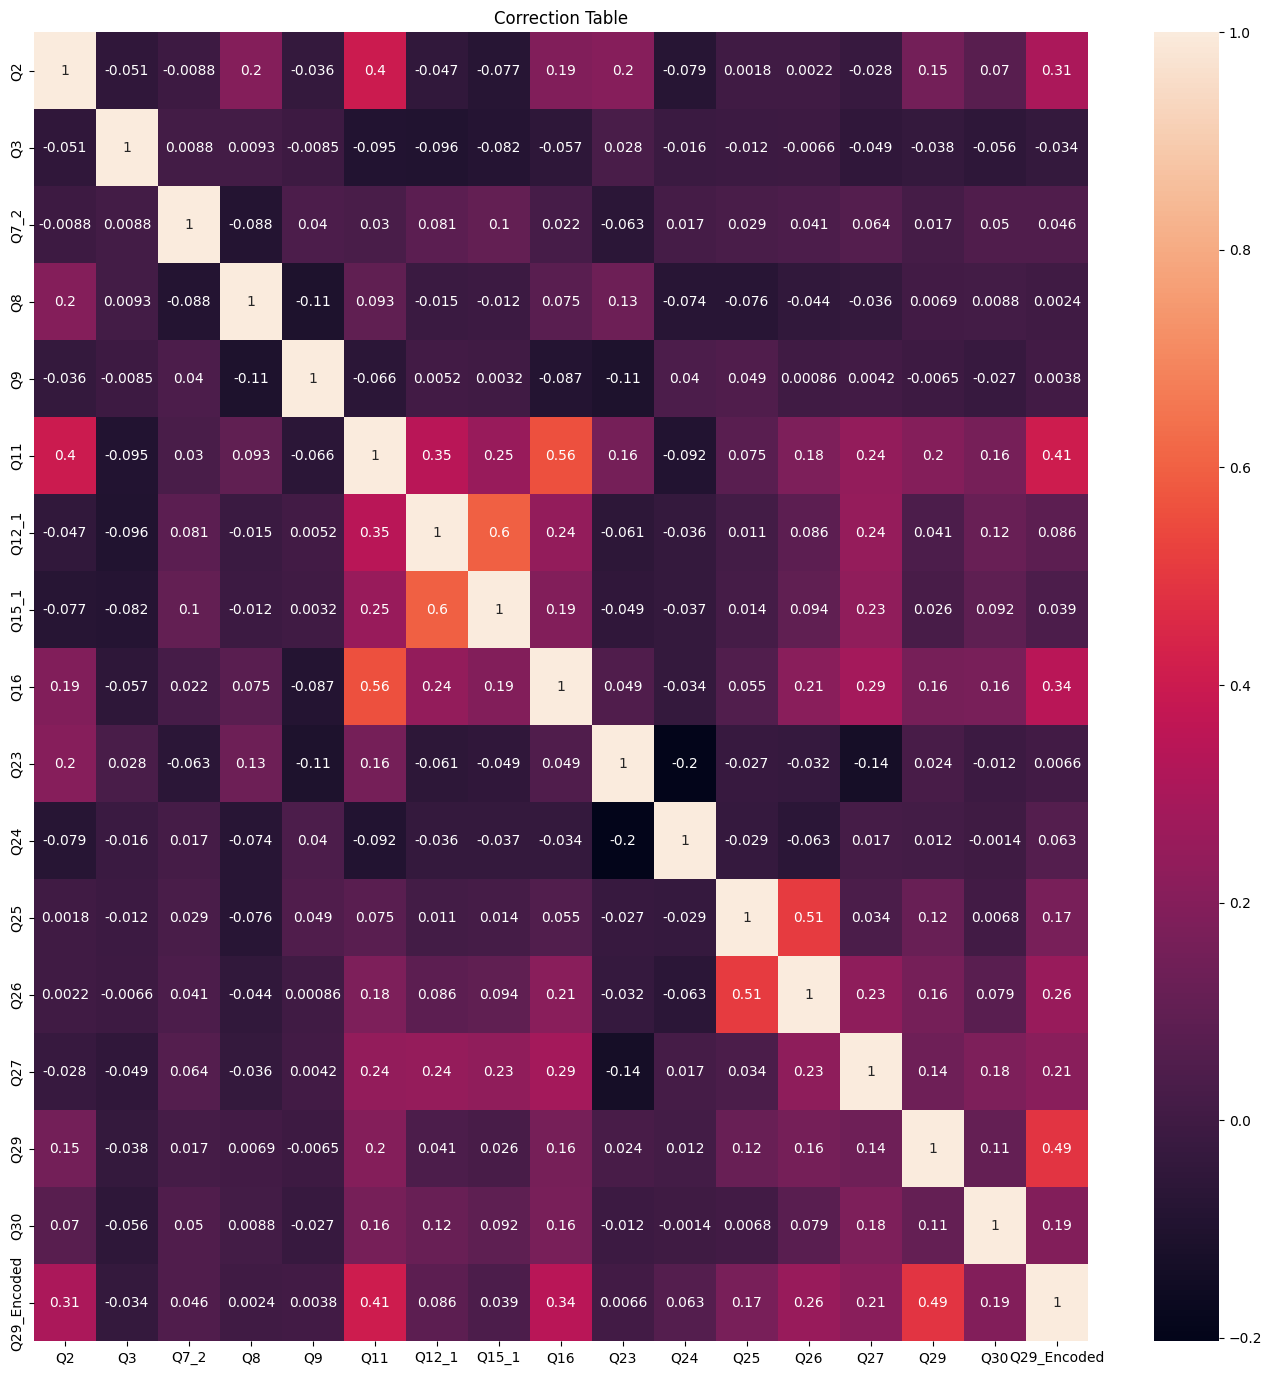

In [18]:
plt.figure(figsize=(17,17))
sns.heatmap(response2.corr(),annot = True)
plt.title("Correction Table")
plt.show()


[-0.40448319  0.65342028 -0.01035033  0.18190634  0.41650497 -0.32310932
  0.85499053 -0.05486431 -0.15225515  0.08005352 -0.02395413 -0.05833321
 -0.15498366 -0.07368892 -0.20373204 -0.06706923]
Feature: 0, Score: -0.40448
Feature: 1, Score: 0.65342
Feature: 2, Score: -0.01035
Feature: 3, Score: 0.18191
Feature: 4, Score: 0.41650
Feature: 5, Score: -0.32311
Feature: 6, Score: 0.85499
Feature: 7, Score: -0.05486
Feature: 8, Score: -0.15226
Feature: 9, Score: 0.08005
Feature: 10, Score: -0.02395
Feature: 11, Score: -0.05833
Feature: 12, Score: -0.15498
Feature: 13, Score: -0.07369
Feature: 14, Score: -0.20373
Feature: 15, Score: -0.06707


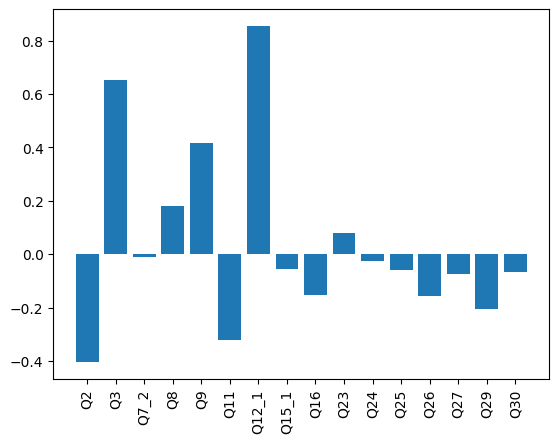

In [19]:
import matplotlib.pyplot as plt
lgstcreg = LogisticRegression()
lgstcreg.fit(response2.iloc[:,:-2],response2.iloc[:,-2:-1])
importance = lgstcreg.coef_[0]
print(importance)
for i,v in enumerate(importance):
    	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in response2.iloc[:,:-2].columns], importance)
plt.xticks(rotation= 90)
plt.show()


In [20]:
select = SelectKBest(score_func=chi2, k = 7)

z = select.fit_transform(response2.iloc[:,:-2],response2.iloc[:,-2:-1])
print("After selecting best 3 features:", z.shape)

filter = select.get_support()
features = np.array(response2.iloc[:,:-2].columns)
 
print("All features:")
print(features)
 
print("Selected best 8:")
print(features[filter])



After selecting best 3 features: (8136, 7)
All features:
['Q2' 'Q3' 'Q7_2' 'Q8' 'Q9' 'Q11' 'Q12_1' 'Q15_1' 'Q16' 'Q23' 'Q24' 'Q25'
 'Q26' 'Q27' 'Q29' 'Q30']
Selected best 8:
['Q2' 'Q11' 'Q16' 'Q26' 'Q27' 'Q29' 'Q30']


**Performing Logistic Regression**

In [21]:


X = response2[['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30']]
X
y = response2.iloc[:,-2:-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
prep_Xtrain_fold  = np.array(X_train)
prep_ytrain_fold  = np.array(y_train)
kf = KFold(n_splits=10,random_state=1,shuffle=True)
foldx_train = []
foldx_test = []
foldy_train = []
foldy_test = []
for train_index,test_index in kf.split(prep_Xtrain_fold):
    X_fold_train, X_fold_test = prep_Xtrain_fold[train_index], prep_Xtrain_fold[test_index]
    y_fold_train, y_fold_test = prep_ytrain_fold[train_index], prep_ytrain_fold[test_index]
    foldx_train.append(X_fold_train)
    foldx_test.append(X_fold_test)
    foldy_train.append(y_fold_train)
    foldy_test.append(y_fold_test)
    
X_fold_train = pd.DataFrame(data=X_fold_test,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
X_fold_train


,Q2,Q11,Q16,Q26,Q27,Q30
0,2,1,1,1,1,1
1,2,4,2,2,0,1
2,2,2,3,1,1,1
3,3,7,6,2,0,4
4,3,7,1,2,2,2
...,...,...,...,...,...,...
564,4,7,3,7,3,2
565,4,1,1,7,2,3
566,4,7,7,7,0,5
567,3,2,1,7,0,1


In [22]:
def preprocessing(y_train,col = "Q29_Encoded"):
    reference = sorted(response2['Q29_Encoded'].value_counts(ascending = True).index)
    all_one = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
            [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
            [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],[1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]]



    encoded1 = {}
    encoded2 = {}
    encoded3 = {}
    encoded4 = {}
    encoded5 = {}
    encoded6 = {}
    encoded7 = {}
    encoded8 = {}
    encoded9 = {}
    encoded10 = {}
    encoded11 = {}
    encoded12 = {}
    encoded13 = {}
    encoded14 = {}
    

    for key in reference:
        for value in all_one[0]:
            encoded1[key] = value
            all_one[0].remove(value)
            break

    for key in reference:
        for value in all_one[1]:
            encoded2[key] = value
            all_one[1].remove(value)
            break
        
    for key in reference:
        for value in all_one[2]:
            encoded3[key] = value
            all_one[2].remove(value)
            break
        
    for key in reference:
        for value in all_one[3]:
            encoded4[key] = value
            all_one[3].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[4]:
            encoded5[key] = value
            all_one[4].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[5]:
            encoded6[key] = value
            all_one[5].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[6]:
            encoded7[key] = value
            all_one[6].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[7]:
            encoded8[key] = value
            all_one[7].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[8]:
            encoded9[key] = value
            all_one[8].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[9]:
            encoded10[key] = value
            all_one[9].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[10]:
            encoded11[key] = value
            all_one[10].remove(value)
            break
        
        
    for key in reference:
        for value in all_one[11]:
            encoded12[key] = value
            all_one[11].remove(value)
            break
        
        
        
    for key in reference:
        for value in all_one[12]:
            encoded13[key] = value
            all_one[12].remove(value)
            break
        
     
    for key in reference:
        for value in all_one[13]:
            encoded14[key] = value
            all_one[13].remove(value)
            break
        

    y_combine = []    

    y1 = y_train[col].map(encoded1)
    y2 = y_train[col].map(encoded2)
    y3 = y_train[col].map(encoded3)
    y4 = y_train[col].map(encoded4)
    y5 = y_train[col].map(encoded5)
    y6 = y_train[col].map(encoded6)
    y7 = y_train[col].map(encoded7)
    y8 = y_train[col].map(encoded8)
    y9 = y_train[col].map(encoded9)
    y10 = y_train[col].map(encoded10)
    y11 = y_train[col].map(encoded11)
    y12 = y_train[col].map(encoded12)
    y13 = y_train[col].map(encoded13)
    y14 = y_train[col].map(encoded14)
    y_combine = [y1.values,y2.values,y3.values,y4.values,y5.values,y6.values,y7.values,y8.values,y9.values,y10.values,y11.values,y12.values,y13.values,y14.values]
    return y_combine

In [23]:
def getAcc(y_pre,y_test):
    count = 0
    y_test = y_test.values

    for i in range(len(y_pre)):
        if y_pre[i] == y_test[i]:
            count+=1
    acc = count/len(y_pre)
    return acc

In [24]:
def getProb(X_train,y_train,X_test,y_test,hyp1,hyp2,c,col="Q29_Encoded"):
    y_combine = preprocessing(y_train,col)
    lg = LogisticRegression(penalty=hyp1,solver=hyp2,C=c)
    target_encode = {"p0":0,
                     "p1":1,
                     "p2":2,
                     "p3":3,
                     "p4":4,
                     "p5":5,
                     "p6":6,
                     "p7":7,
                     "p8":8,
                     "p9":9,
                     "p10":10,
                     "p11":11,
                     "p12":12,
                     "p13":13,
                     "p14":14}
    prob = []
    llll = []
    # mean_train_list = []
    # mean_val_list = []
    # std_train_list = []
    # std_val_list = []
    # cv = 10
    for target in range(len(y_combine)):
        Olg = lg.fit(X_train,y_combine[target])
        probability = lg.predict_proba(X_test)

        llll.append(probability[:,1])
    llll.append(probability[:,1])
    llll = np.array(llll)
    for i in range(len(llll)):
        if i == 0:
            prob.append(llll[i])
        if i!=0:
            probs = llll[i] - llll[i-1]
            prob.append(probs)
    prob = np.array(prob)

    result = pd.DataFrame({'p0':prob[0],'p1':prob[1],'p2':prob[2],'p3':prob[3],'p4':prob[4],'p5':prob[5],'p6':prob[6],'p7':prob[7],'p8':prob[8],'p9':prob[9],'p10':prob[10],'p11':prob[11],'p12':prob[12],'p13':prob[13],'p14':prob[14],})
    trueT = result.idxmax(axis=1)
    result["Predicted_class"] = trueT
    result["Predicted_class"] = result["Predicted_class"].map(target_encode)

    accuracy = getAcc(result["Predicted_class"],y_test)

    return result,accuracy

In [25]:
## Measure 10 fold cross validation ##
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
accuracy = np.zeros(10)
F1 = np.zeros(10)
np_idx = 0
        
prep_Xtrain_fold  = np.array(X_train)
prep_ytrain_fold  = np.array(y_train)
kf = KFold(n_splits=10,random_state=1,shuffle=True)
foldx_train = []
foldx_test = []
foldy_train = []
foldy_test = []
acc_list = []
acc_list2 = []
acc_list3 = []
for train_index,test_index in kf.split(prep_Xtrain_fold):
        X_fold_train, X_fold_test = prep_Xtrain_fold[train_index], prep_Xtrain_fold[test_index]
        y_fold_train, y_fold_test = prep_ytrain_fold[train_index], prep_ytrain_fold[test_index]
        foldx_train.append(X_fold_train)
        foldx_test.append(X_fold_test)
        foldy_train.append(y_fold_train)
        foldy_test.append(y_fold_test)
            
        X_fold_train = pd.DataFrame(data=X_fold_train,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        X_fold_test = pd.DataFrame(data=X_fold_test,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        y_fold_train =pd.DataFrame(data=y_fold_train,columns=["Q29_Encoded"]) 
        y_fold_test =pd.DataFrame(data=y_fold_test,columns=["Q29_Encoded"])

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        result,acc = getProb(X_fold_train,y_fold_train,X_fold_test,y_fold_test,'l2','newton-cg',c=1)
        predictions = result.Predicted_class

        TN = confusion_matrix(y_fold_test, predictions)[0][0]
        FP = confusion_matrix(y_fold_test, predictions)[0][1]
        FN = confusion_matrix(y_fold_test, predictions)[1][0]
        TP = confusion_matrix(y_fold_test, predictions)[1][1]
        F1_score = f1_score(y_fold_test, predictions,average = 'macro')
        total = TN + FP + FN + TP
        ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        F1[np_idx] = F1_score
        np_idx += 1
        print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 82.812%
Fold 2: Accuracy: 76.604%
Fold 3: Accuracy: 81.206%
Fold 4: Accuracy: 80.233%
Fold 5: Accuracy: 76.448%
Fold 6: Accuracy: 80.827%
Fold 7: Accuracy: 76.265%
Fold 8: Accuracy: 81.395%
Fold 9: Accuracy: 82.331%
Fold 10: Accuracy: 83.73%
Average Score: 80.185%(2.63%)


In [26]:
## Measure 10 fold cross validation ##
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
accuracy = np.zeros(10)
F1 = np.zeros(10)
np_idx = 0
        
prep_Xtrain_fold  = np.array(X_train)
prep_ytrain_fold  = np.array(y_train)
kf = KFold(n_splits=10,random_state=1,shuffle=True)
foldx_train = []
foldx_test = []
foldy_train = []
foldy_test = []
acc_list = []
acc_list2 = []
acc_list3 = []
for train_index,test_index in kf.split(prep_Xtrain_fold):
        X_fold_train, X_fold_test = prep_Xtrain_fold[train_index], prep_Xtrain_fold[test_index]
        y_fold_train, y_fold_test = prep_ytrain_fold[train_index], prep_ytrain_fold[test_index]
        foldx_train.append(X_fold_train)
        foldx_test.append(X_fold_test)
        foldy_train.append(y_fold_train)
        foldy_test.append(y_fold_test)
            
        X_fold_train = pd.DataFrame(data=X_fold_train,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        X_fold_test = pd.DataFrame(data=X_fold_test,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        y_fold_train =pd.DataFrame(data=y_fold_train,columns=["Q29_Encoded"]) 
        y_fold_test =pd.DataFrame(data=y_fold_test,columns=["Q29_Encoded"])

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        result,acc = getProb(X_fold_train,y_fold_train,X_fold_test,y_fold_test,'l2','liblinear',c=1)
        predictions = result.Predicted_class

        TN = confusion_matrix(y_fold_test, predictions)[0][0]
        FP = confusion_matrix(y_fold_test, predictions)[0][1]
        FN = confusion_matrix(y_fold_test, predictions)[1][0]
        TP = confusion_matrix(y_fold_test, predictions)[1][1]
        F1_score = f1_score(y_fold_test, predictions,average = 'macro')
        total = TN + FP + FN + TP
        ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        F1[np_idx] = F1_score
        np_idx += 1
        print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 82.812%
Fold 2: Accuracy: 76.604%
Fold 3: Accuracy: 81.206%
Fold 4: Accuracy: 80.233%
Fold 5: Accuracy: 76.448%
Fold 6: Accuracy: 80.827%
Fold 7: Accuracy: 76.265%
Fold 8: Accuracy: 81.395%
Fold 9: Accuracy: 82.331%
Fold 10: Accuracy: 83.794%
Average Score: 80.191%(2.639%)


In [27]:
## Measure 10 fold cross validation ##
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
accuracy = np.zeros(10)
F1 = np.zeros(10)
np_idx = 0
        
prep_Xtrain_fold  = np.array(X_train)
prep_ytrain_fold  = np.array(y_train)
kf = KFold(n_splits=10,random_state=1,shuffle=True)
foldx_train = []
foldx_test = []
foldy_train = []
foldy_test = []
acc_list = []
acc_list2 = []
acc_list3 = []
for train_index,test_index in kf.split(prep_Xtrain_fold):
        X_fold_train, X_fold_test = prep_Xtrain_fold[train_index], prep_Xtrain_fold[test_index]
        y_fold_train, y_fold_test = prep_ytrain_fold[train_index], prep_ytrain_fold[test_index]
        foldx_train.append(X_fold_train)
        foldx_test.append(X_fold_test)
        foldy_train.append(y_fold_train)
        foldy_test.append(y_fold_test)
            
        X_fold_train = pd.DataFrame(data=X_fold_train,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        X_fold_test = pd.DataFrame(data=X_fold_test,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        y_fold_train =pd.DataFrame(data=y_fold_train,columns=["Q29_Encoded"]) 
        y_fold_test =pd.DataFrame(data=y_fold_test,columns=["Q29_Encoded"])

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        result,acc = getProb(X_fold_train,y_fold_train,X_fold_test,y_fold_test,'l2','saga',c=1)
        predictions = result.Predicted_class

        TN = confusion_matrix(y_fold_test, predictions)[0][0]
        FP = confusion_matrix(y_fold_test, predictions)[0][1]
        FN = confusion_matrix(y_fold_test, predictions)[1][0]
        TP = confusion_matrix(y_fold_test, predictions)[1][1]
        F1_score = f1_score(y_fold_test, predictions,average = 'macro')
        total = TN + FP + FN + TP
        ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        F1[np_idx] = F1_score
        np_idx += 1
        print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 82.812%
Fold 2: Accuracy: 76.604%
Fold 3: Accuracy: 81.206%
Fold 4: Accuracy: 80.233%
Fold 5: Accuracy: 76.448%
Fold 6: Accuracy: 80.827%
Fold 7: Accuracy: 76.265%
Fold 8: Accuracy: 81.395%
Fold 9: Accuracy: 82.331%
Fold 10: Accuracy: 83.73%
Average Score: 80.185%(2.63%)


Fold 1: Accuracy: 82.812%
Fold 2: Accuracy: 76.604%
Fold 3: Accuracy: 81.206%
Fold 4: Accuracy: 80.233%
Fold 5: Accuracy: 76.448%
Fold 6: Accuracy: 80.827%
Fold 7: Accuracy: 76.265%
Fold 8: Accuracy: 81.395%
Fold 9: Accuracy: 82.331%
Fold 10: Accuracy: 83.73%
Average Score: 80.185%(2.63%)


Text(0.5, 1.0, '10 Fold Cross Validation')

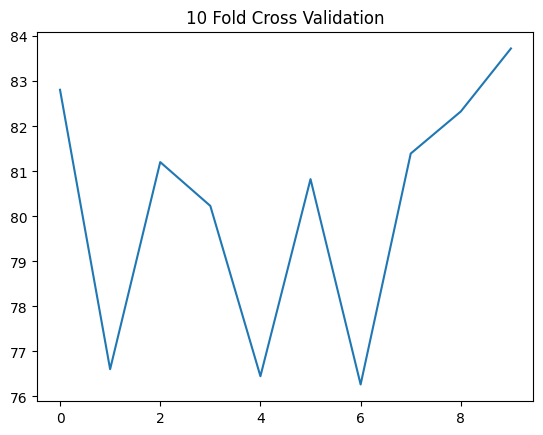

In [28]:
## Measure 10 fold cross validation ##
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
accuracy = np.zeros(10)
F1 = np.zeros(10)
np_idx = 0
        
prep_Xtrain_fold  = np.array(X_train)
prep_ytrain_fold  = np.array(y_train)
kf = KFold(n_splits=10,random_state=1,shuffle=True)
foldx_train = []
foldx_test = []
foldy_train = []
foldy_test = []
acc_list = []

acc_list2 = []
acc_list3 = []
for train_index,test_index in kf.split(prep_Xtrain_fold):
        X_fold_train, X_fold_test = prep_Xtrain_fold[train_index], prep_Xtrain_fold[test_index]
        y_fold_train, y_fold_test = prep_ytrain_fold[train_index], prep_ytrain_fold[test_index]
        foldx_train.append(X_fold_train)
        foldx_test.append(X_fold_test)
        foldy_train.append(y_fold_train)
        foldy_test.append(y_fold_test)
            
        X_fold_train = pd.DataFrame(data=X_fold_train,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        X_fold_test = pd.DataFrame(data=X_fold_test,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
        y_fold_train =pd.DataFrame(data=y_fold_train,columns=["Q29_Encoded"]) 
        y_fold_test =pd.DataFrame(data=y_fold_test,columns=["Q29_Encoded"])

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        result,acc = getProb(X_fold_train,y_fold_train,X_fold_test,y_fold_test,'l2','sag',c=1)
        predictions = result.Predicted_class

        TN = confusion_matrix(y_fold_test, predictions)[0][0]
        FP = confusion_matrix(y_fold_test, predictions)[0][1]
        FN = confusion_matrix(y_fold_test, predictions)[1][0]
        TP = confusion_matrix(y_fold_test, predictions)[1][1]
        F1_score = f1_score(y_fold_test, predictions,average = 'macro')
        total = TN + FP + FN + TP
        ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        F1[np_idx] = F1_score
        np_idx += 1
        print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
plt.plot(accuracy)
plt.title("10 Fold Cross Validation")

In [29]:
result,acc = getProb(X_train,y_train,X_train,y_train,'l2','lbfgs',c = 1,col="Q29_Encoded")

result

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,Predicted_class
0,0.131264,0.064539,0.075199,0.069204,0.060089,0.054296,0.035077,0.044508,0.052168,0.027813,0.098269,0.107937,0.089237,0.068569,0.0,0
1,0.774925,0.076542,0.043564,0.021101,0.022194,0.016273,0.012762,0.010649,0.005425,0.003436,0.004913,0.003731,0.002471,0.000687,0.0,0
2,0.086616,0.056926,0.050540,0.059112,0.065065,0.051391,0.053823,0.053727,0.042969,0.036222,0.118511,0.069955,0.121164,0.078689,0.0,12
3,0.060898,0.025129,0.036426,0.044603,0.031742,0.049985,0.044477,0.034922,0.042174,0.041892,0.116824,0.099784,0.189497,0.122792,0.0,12
4,0.058775,0.026343,0.034020,0.042997,0.032693,0.044900,0.054401,0.040226,0.034755,0.042843,0.126146,0.074952,0.187261,0.114232,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,0.353915,0.116263,0.102648,0.069567,0.060118,0.051323,0.034056,0.036964,0.031875,0.018085,0.039734,0.038337,0.025309,0.014907,0.0,0
5691,0.514869,0.097270,0.085554,0.054705,0.032032,0.046708,0.040274,0.032723,0.017234,0.018328,0.021652,0.017478,0.011794,0.004292,0.0,0
5692,0.626317,0.113032,0.065678,0.036577,0.033743,0.025311,0.020698,0.018163,0.011160,0.008325,0.013701,0.011902,0.007870,0.003679,0.0,0
5693,0.278483,0.124159,0.098022,0.074827,0.073924,0.050187,0.054640,0.058476,0.031555,0.022819,0.050664,0.032896,0.024320,0.013501,0.0,0


**Hyperparameter Tune**


In [30]:
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
penaly = ['l2','l1','elasticnet','none']

In [31]:

for solve in solver:
    print("The Hyperparameter Used Here Is: " + solve)
    print("The Hyperparameter Penalty Used Here Is " + penaly[0])
    result,acc = getProb(X_train,y_train,X_train,y_train,penaly[0],solve,c = 1)

    print("The Accuracy is " + str(acc))
    print("------------------------------------")

The Hyperparameter Used Here Is: newton-cg
The Hyperparameter Penalty Used Here Is l2
The Accuracy is 0.3863037752414399
------------------------------------
The Hyperparameter Used Here Is: lbfgs
The Hyperparameter Penalty Used Here Is l2
The Accuracy is 0.3863037752414399
------------------------------------
The Hyperparameter Used Here Is: liblinear
The Hyperparameter Penalty Used Here Is l2
The Accuracy is 0.3863037752414399
------------------------------------
The Hyperparameter Used Here Is: sag
The Hyperparameter Penalty Used Here Is l2
The Accuracy is 0.38647936786654963
------------------------------------
The Hyperparameter Used Here Is: saga
The Hyperparameter Penalty Used Here Is l2
The Accuracy is 0.3863037752414399
------------------------------------


In [32]:
solver = ['newton-cg','lbfgs','sag','saga']
penaly = ['l2','l1','elasticnet','none']

In [33]:
for solve in solver:
    print("The Hyperparameter Used Here Is: " + solve)
    print("The Hyperparameter Penalty Used Here Is " + penaly[3])
    result,acc = getProb(X_train,y_train,X_train,y_train,penaly[3],solve,c = 1)

    print("The Accuracy is " + str(acc))
    print("------------------------------------")

The Hyperparameter Used Here Is: newton-cg
The Hyperparameter Penalty Used Here Is none
The Accuracy is 0.3863037752414399
------------------------------------
The Hyperparameter Used Here Is: lbfgs
The Hyperparameter Penalty Used Here Is none
The Accuracy is 0.3863037752414399
------------------------------------
The Hyperparameter Used Here Is: sag
The Hyperparameter Penalty Used Here Is none
The Accuracy is 0.3863037752414399
------------------------------------
The Hyperparameter Used Here Is: saga
The Hyperparameter Penalty Used Here Is none
The Accuracy is 0.3863037752414399
------------------------------------


In [34]:
solver = ['liblinear','saga']
penaly = ['l2','l1','elasticnet','none']

In [35]:
for solve in solver:
    print("The Hyperparameter Used Here Is: " + solve)
    print("The Hyperparameter Penalty Used Here Is " + penaly[1])
    result,acc = getProb(X_train,y_train,X_train,y_train,penaly[1],solve,c = 1)
    print("The Accuracy is " + str(acc))
    print("------------------------------------")

The Hyperparameter Used Here Is: liblinear
The Hyperparameter Penalty Used Here Is l1
The Accuracy is 0.3863037752414399
------------------------------------
The Hyperparameter Used Here Is: saga
The Hyperparameter Penalty Used Here Is l1
The Accuracy is 0.3863037752414399
------------------------------------


**MODEL TUNING**

In [36]:
# ## Grid Search ##
# import warnings

        
        
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        accuracy = np.zeros(10)
        F1 = np.zeros(10)
        np_idx = 0
        
        prep_Xtrain_fold  = np.array(X_train)
        prep_ytrain_fold  = np.array(y_train)
        kf = KFold(n_splits=10,random_state=1,shuffle=True)
        foldx_train = []
        foldx_test = []
        foldy_train = []
        foldy_test = []
        acc_list = []
        acc_list2 = []
        acc_list3 = []
        for train_index,test_index in kf.split(prep_Xtrain_fold):
            X_fold_train, X_fold_test = prep_Xtrain_fold[train_index], prep_Xtrain_fold[test_index]
            y_fold_train, y_fold_test = prep_ytrain_fold[train_index], prep_ytrain_fold[test_index]
            foldx_train.append(X_fold_train)
            foldx_test.append(X_fold_test)
            foldy_train.append(y_fold_train)
            foldy_test.append(y_fold_test)
            
            X_fold_train = pd.DataFrame(data=X_fold_train,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
            X_fold_test = pd.DataFrame(data=X_fold_test,columns=['Q2', 'Q11', 'Q16', 'Q26','Q27','Q30'])
            y_fold_train =pd.DataFrame(data=y_fold_train,columns=["Q29_Encoded"]) 
            y_fold_test =pd.DataFrame(data=y_fold_test,columns=["Q29_Encoded"])

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            result,acc = getProb(X_fold_train,y_fold_train,X_fold_test,y_fold_test,'l2',solver,C)
            predictions = result.Predicted_class

            TN = confusion_matrix(y_fold_test, predictions)[0][0]
            FP = confusion_matrix(y_fold_test, predictions)[0][1]
            FN = confusion_matrix(y_fold_test, predictions)[1][0]
            TP = confusion_matrix(y_fold_test, predictions)[1][1]
            F1_score = f1_score(y_fold_test, predictions,average = 'macro')
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            F1[np_idx] = F1_score
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_f1 = np.mean(F1)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {} {}%({}%)".format(round(best_f1,3),round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}% and with a F1_Score of {}".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3),round(best_f1,3)))
    



{'C': 0.1, 'solver': 'liblinear'}
Best Score: 0.058 80.214%(2.637%)

The optimal log model uses C=0.1, and a liblinear solver, and has a cross validation score of 80.214% with a standard deviation of 2.637% and with a F1_Score of 0.058


In [37]:
# plt.figure(figsize=(17,17))
# sns.heatmap(X.corr(),annot = True)
# plt.title("Correction Table")
# plt.show()

# resultant = {}
# resultant = pd.DataFrame(data = resultant,columns=X.columns,index = X.columns)

# for i in list(X.columns):
#     for j in list(X.columns):
#         if i != j:
#             chi2_val, p_val = chi2(np.array(X[i]).reshape(-1, 1), np.array(X[j]).reshape(-1, 1))
#             resultant.loc[i,j] = p_val
            
# resultant

In [38]:
# result,acc = getProb(X_train,y_train,X_train,y_train,"l2",'newton-cg')

# predicted_target = result.Predicted_class
# F_score = f1_score(y_train,predicted_target,average='macro')
# print(F_score)

Feature: 0, Score: -0.42367
Feature: 1, Score: -0.26639
Feature: 2, Score: -0.14855
Feature: 3, Score: -0.21090
Feature: 4, Score: -0.13613
Feature: 5, Score: -0.12662


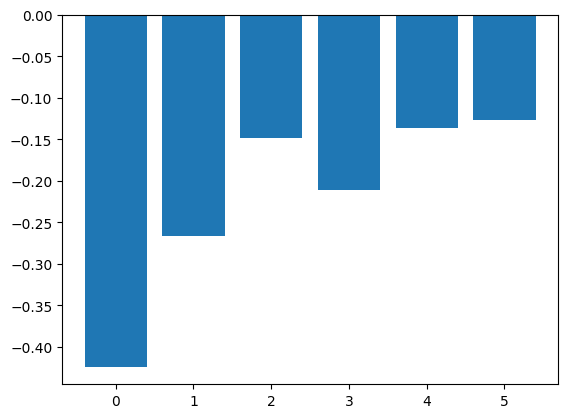

In [39]:
import matplotlib.pyplot as plt
lgstcreg = LogisticRegression(C=0.5,solver='newton-cg',penalty='l2')
lgstcreg.fit(X,y)
importance = lgstcreg.coef_[0]

for i,v in enumerate(importance):
    	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
result,acc = getProb(X_train,y_train,X_test,y_test,'l2','newton-cg',c = 0.5,col="Q29_Encoded")
result_train,acc_train = getProb(X_train,y_train,X_train,y_train,'l2','newton-cg',c = 0.5,col="Q29_Encoded")

0.3678820155673904


,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,Predicted_class
0,0.618480,0.103780,0.066256,0.035971,0.025410,0.021523,0.026592,0.017645,0.009170,0.011351,0.020114,0.018083,0.011566,0.006245,0.0,0
1,0.105869,0.065642,0.064392,0.068211,0.078725,0.064671,0.048358,0.061749,0.058417,0.032470,0.103494,0.076780,0.090336,0.055526,0.0,0
2,0.025395,0.015728,0.016733,0.025125,0.023312,0.027536,0.021220,0.017218,0.024285,0.024603,0.092732,0.066490,0.231186,0.245371,0.0,13
3,0.258417,0.112773,0.085783,0.075288,0.064559,0.060508,0.043108,0.039343,0.034073,0.030703,0.057067,0.047817,0.047902,0.025882,0.0,0
4,0.124288,0.043567,0.072798,0.074440,0.071790,0.100732,0.071054,0.076843,0.074224,0.041397,0.084596,0.060394,0.068396,0.025053,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.079083,0.029808,0.050585,0.056755,0.049641,0.072287,0.075951,0.083084,0.068406,0.052335,0.124970,0.080415,0.105785,0.045810,0.0,10
2437,0.405829,0.133766,0.089957,0.061575,0.053843,0.042019,0.023772,0.024088,0.025083,0.016640,0.034241,0.037329,0.026474,0.016867,0.0,0
2438,0.191888,0.104513,0.085362,0.073498,0.072587,0.042294,0.061090,0.063683,0.033571,0.028683,0.084202,0.054040,0.046018,0.031912,0.0,0
2439,0.056495,0.036616,0.035496,0.046514,0.049034,0.050239,0.032529,0.031648,0.043781,0.033857,0.111195,0.087085,0.184099,0.136973,0.0,12


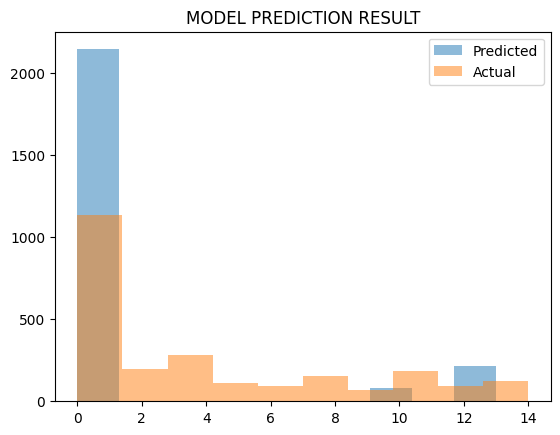

In [41]:

print(acc)
plt.hist(result.Predicted_class,alpha = 0.5,label = 'Predicted')
plt.hist(y_test,alpha =0.5,label = 'Actual')
plt.legend()
plt.title("MODEL PREDICTION RESULT")
result

0.3678820155673904


,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,Predicted_class
0,0.618480,0.103780,0.066256,0.035971,0.025410,0.021523,0.026592,0.017645,0.009170,0.011351,0.020114,0.018083,0.011566,0.006245,0.0,0
1,0.105869,0.065642,0.064392,0.068211,0.078725,0.064671,0.048358,0.061749,0.058417,0.032470,0.103494,0.076780,0.090336,0.055526,0.0,0
2,0.025395,0.015728,0.016733,0.025125,0.023312,0.027536,0.021220,0.017218,0.024285,0.024603,0.092732,0.066490,0.231186,0.245371,0.0,13
3,0.258417,0.112773,0.085783,0.075288,0.064559,0.060508,0.043108,0.039343,0.034073,0.030703,0.057067,0.047817,0.047902,0.025882,0.0,0
4,0.124288,0.043567,0.072798,0.074440,0.071790,0.100732,0.071054,0.076843,0.074224,0.041397,0.084596,0.060394,0.068396,0.025053,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.079083,0.029808,0.050585,0.056755,0.049641,0.072287,0.075951,0.083084,0.068406,0.052335,0.124970,0.080415,0.105785,0.045810,0.0,10
2437,0.405829,0.133766,0.089957,0.061575,0.053843,0.042019,0.023772,0.024088,0.025083,0.016640,0.034241,0.037329,0.026474,0.016867,0.0,0
2438,0.191888,0.104513,0.085362,0.073498,0.072587,0.042294,0.061090,0.063683,0.033571,0.028683,0.084202,0.054040,0.046018,0.031912,0.0,0
2439,0.056495,0.036616,0.035496,0.046514,0.049034,0.050239,0.032529,0.031648,0.043781,0.033857,0.111195,0.087085,0.184099,0.136973,0.0,12


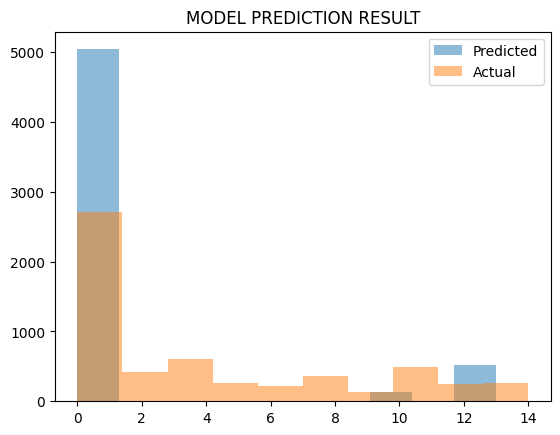

In [42]:

print(acc)
plt.hist(result_train.Predicted_class,alpha = 0.5,label = 'Predicted')
plt.hist(y_train,alpha =0.5,label = 'Actual')
plt.legend()
plt.title("MODEL PREDICTION RESULT")
result